In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [143]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires (1).csv


In [144]:
data = pd.read_csv("forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [145]:
# deviding the data frame for Visualizing purpose
df = data[['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'size_category']]
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [146]:
df.shape

(517, 12)

In [147]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [148]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [149]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [151]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [152]:
df.duplicated().sum()

8

In [153]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [154]:
df.drop_duplicates(inplace = True)

In [155]:
# Also dropping the duplicate rows from the original data
data.drop_duplicates(inplace = True)

In [156]:
data.duplicated().sum()

0

In [157]:
data["size_category"].value_counts()

small    371
large    138
Name: size_category, dtype: int64

In [158]:
data["month"].value_counts()

aug    178
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [159]:
data["day"].value_counts()

sun    94
fri    83
sat    82
mon    74
tue    63
thu    60
wed    53
Name: day, dtype: int64

In [160]:
data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [161]:
data.shape

(509, 31)

## EDA

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area')])

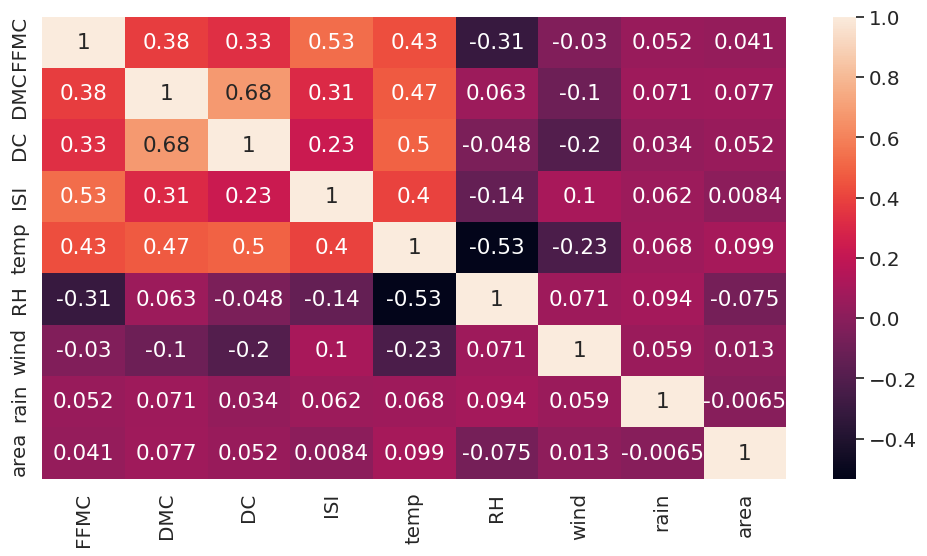

In [162]:
fig= plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=90)

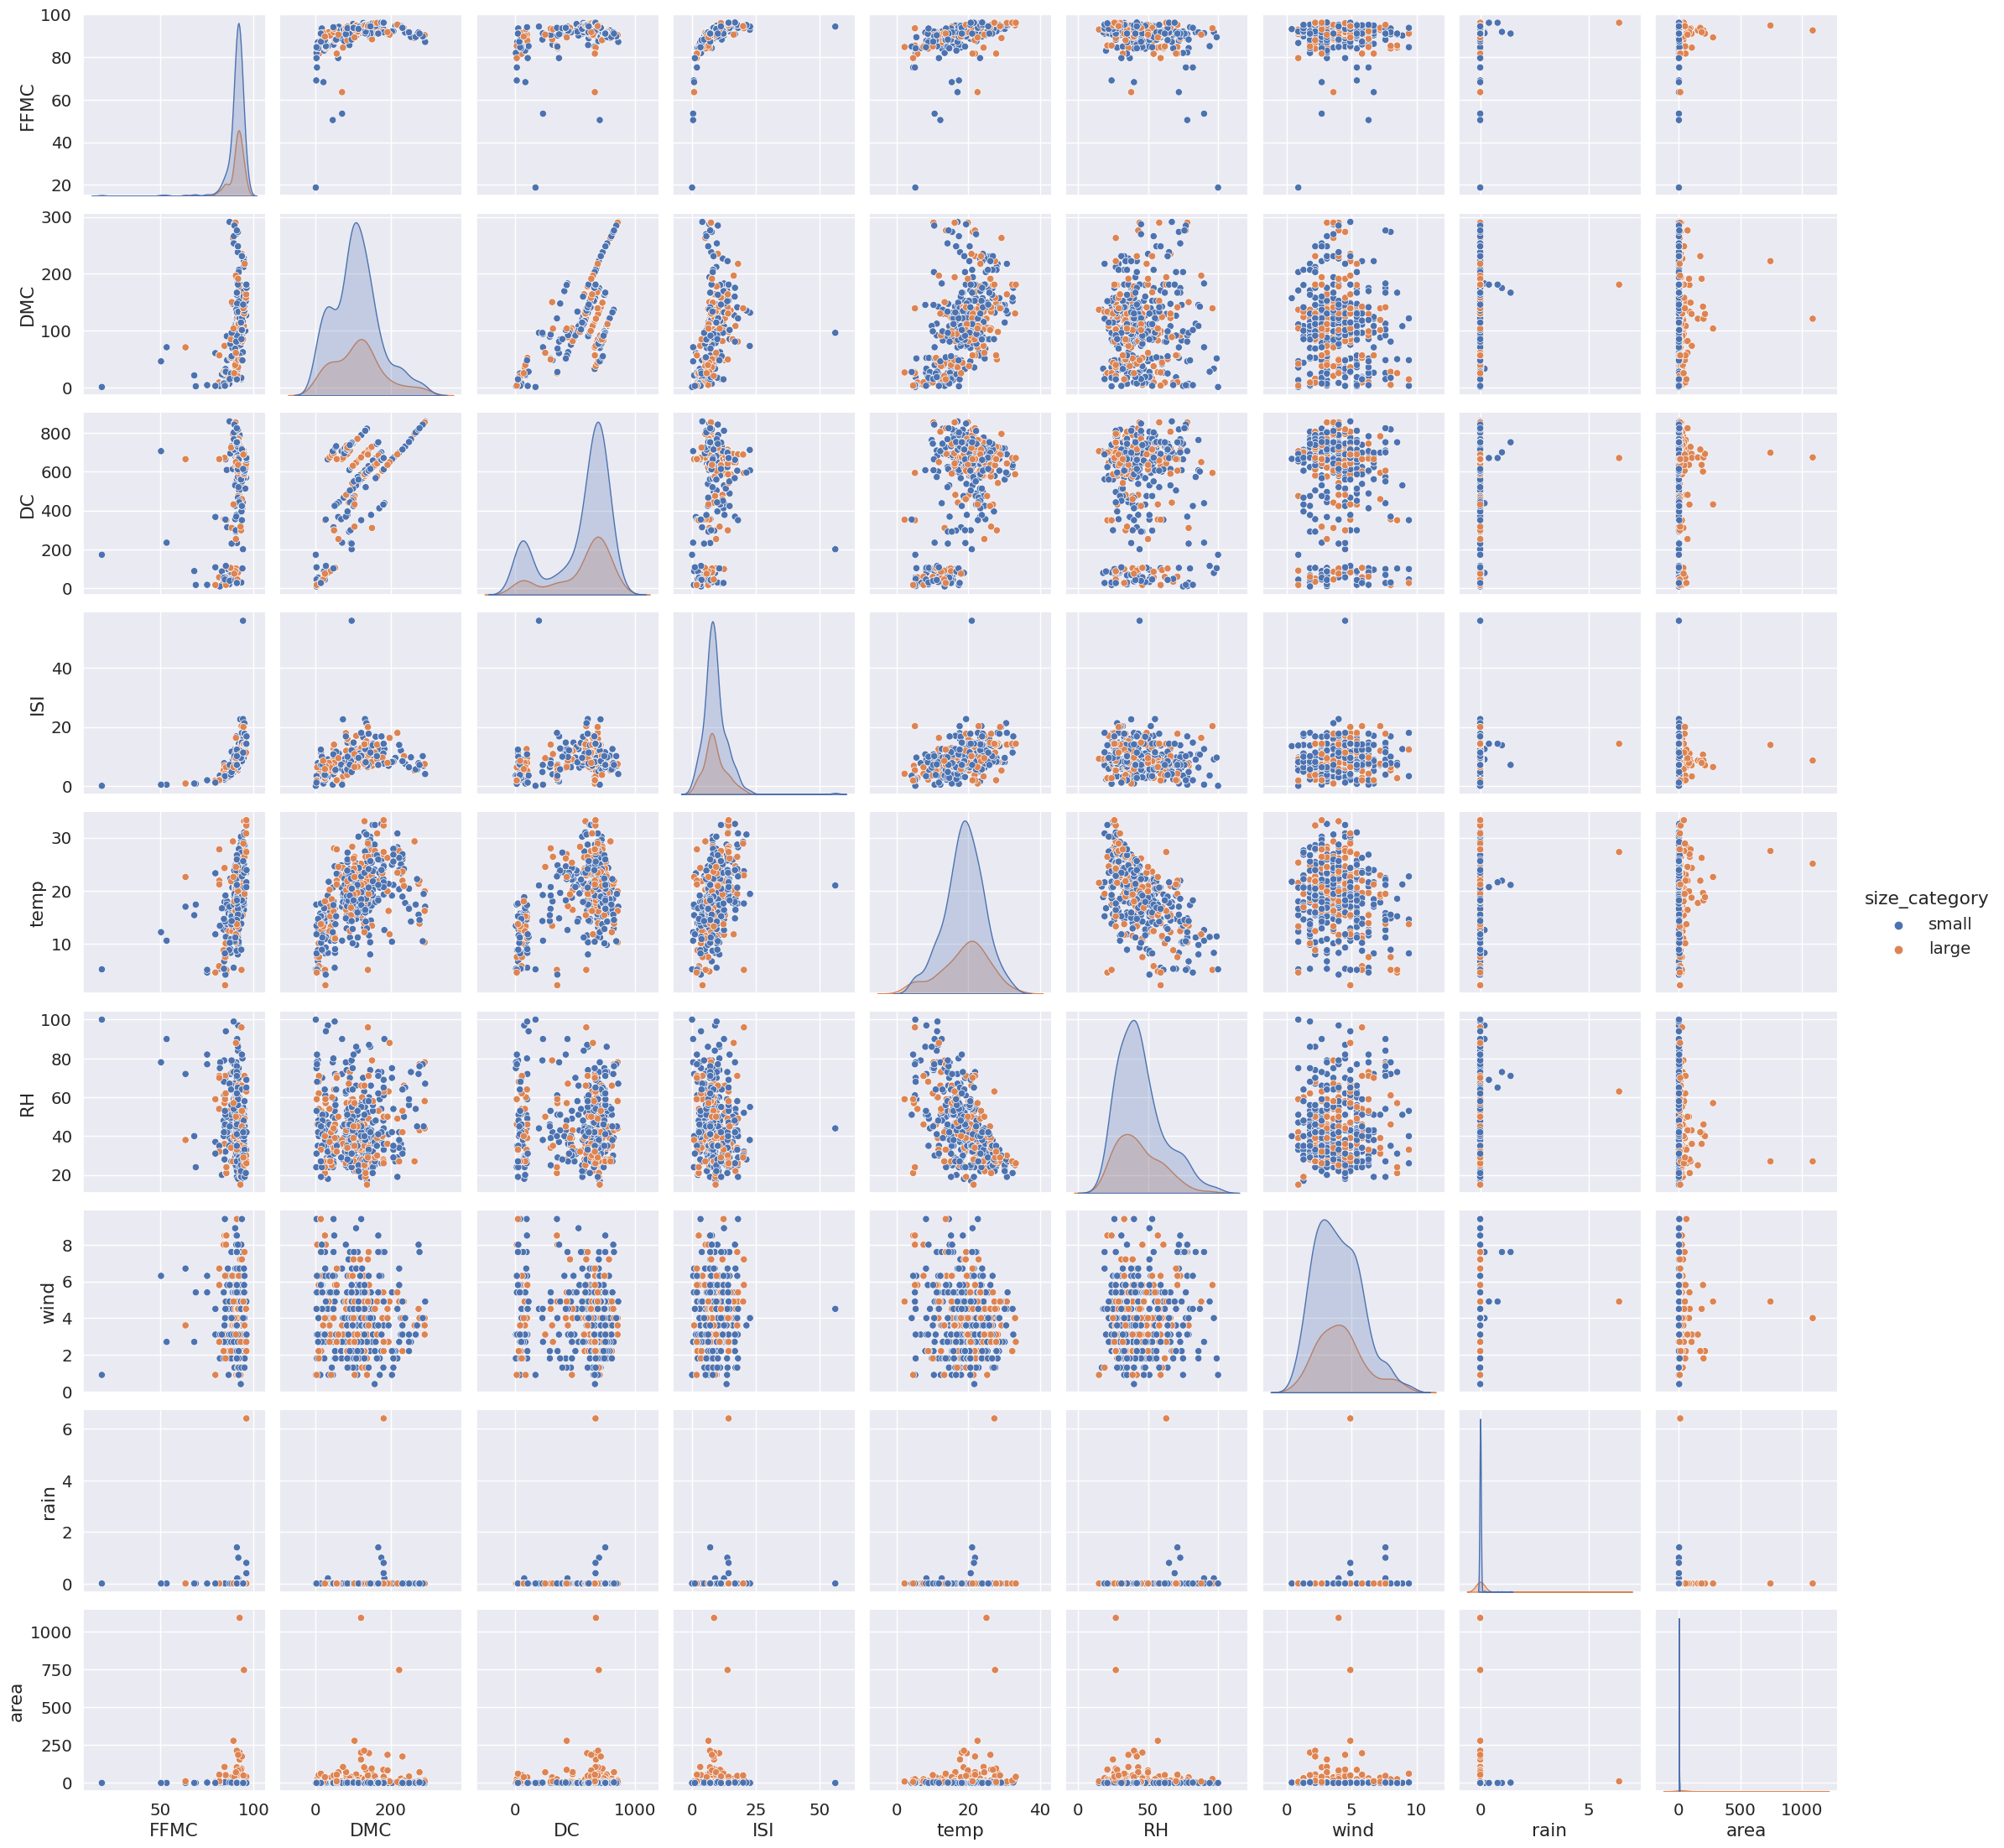

In [163]:
sns.set_style('darkgrid')
sns.pairplot(df, hue='size_category')
plt.show()

array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>]], dtype=object)

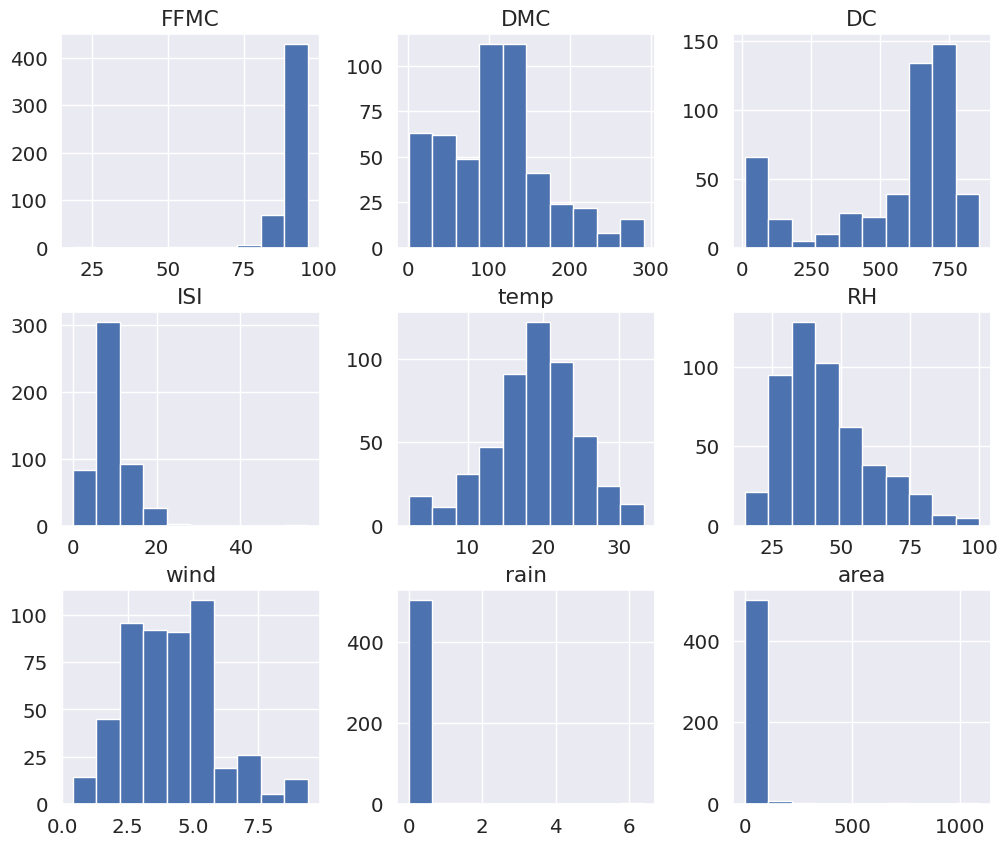

In [164]:
df.hist(figsize = (12,10))

<Axes: xlabel='FFMC', ylabel='Density'>

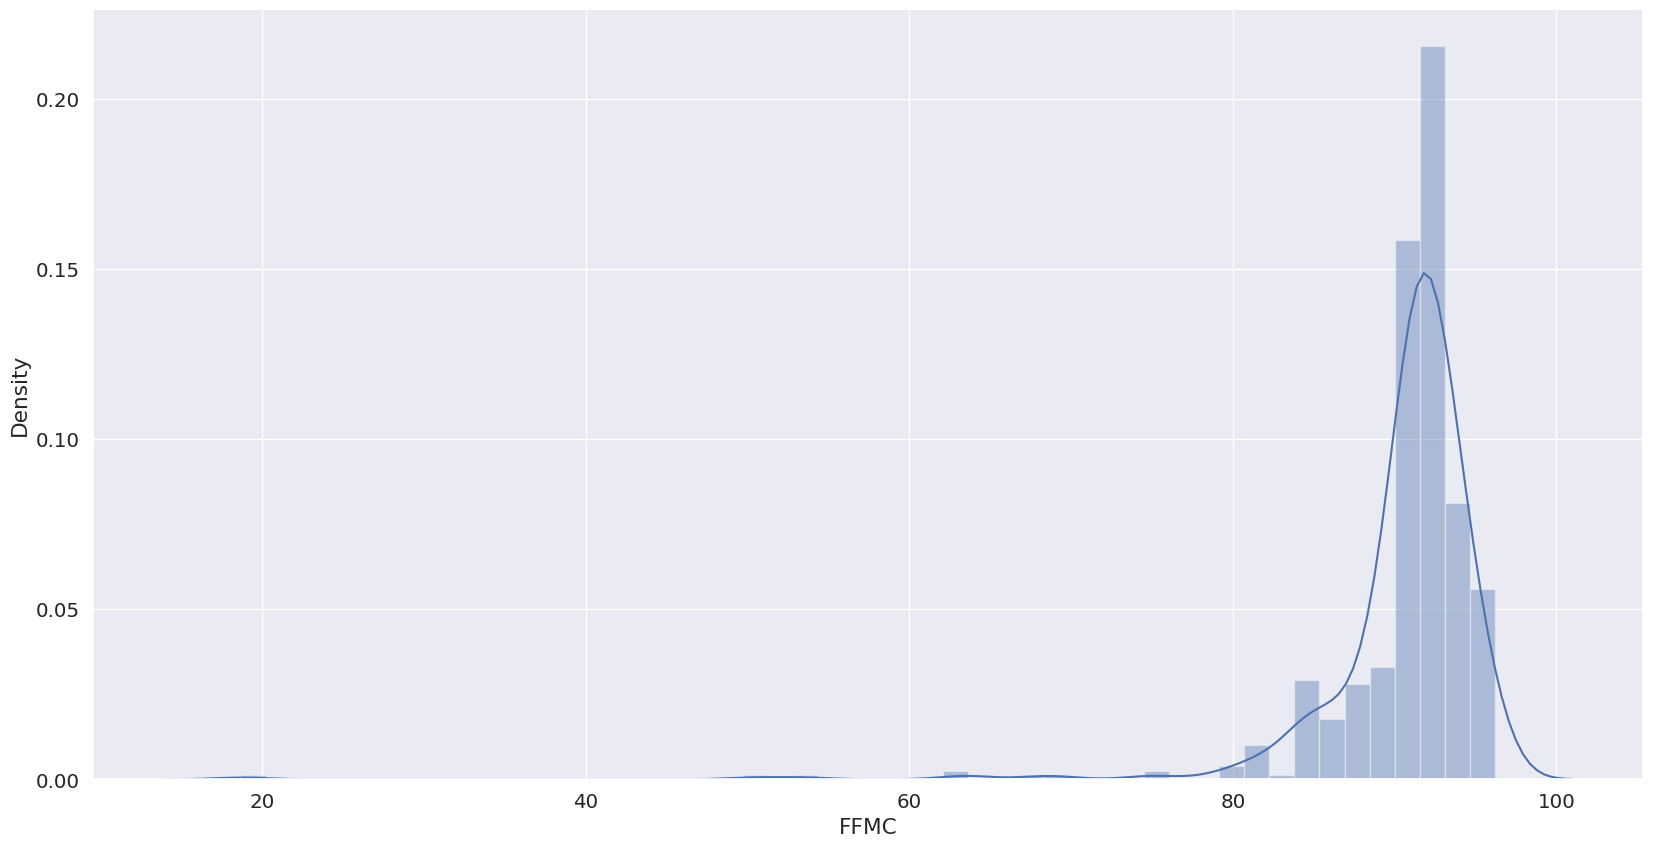

In [165]:
sns.distplot(df["FFMC"],hist = True)

<Axes: xlabel='DMC', ylabel='Density'>

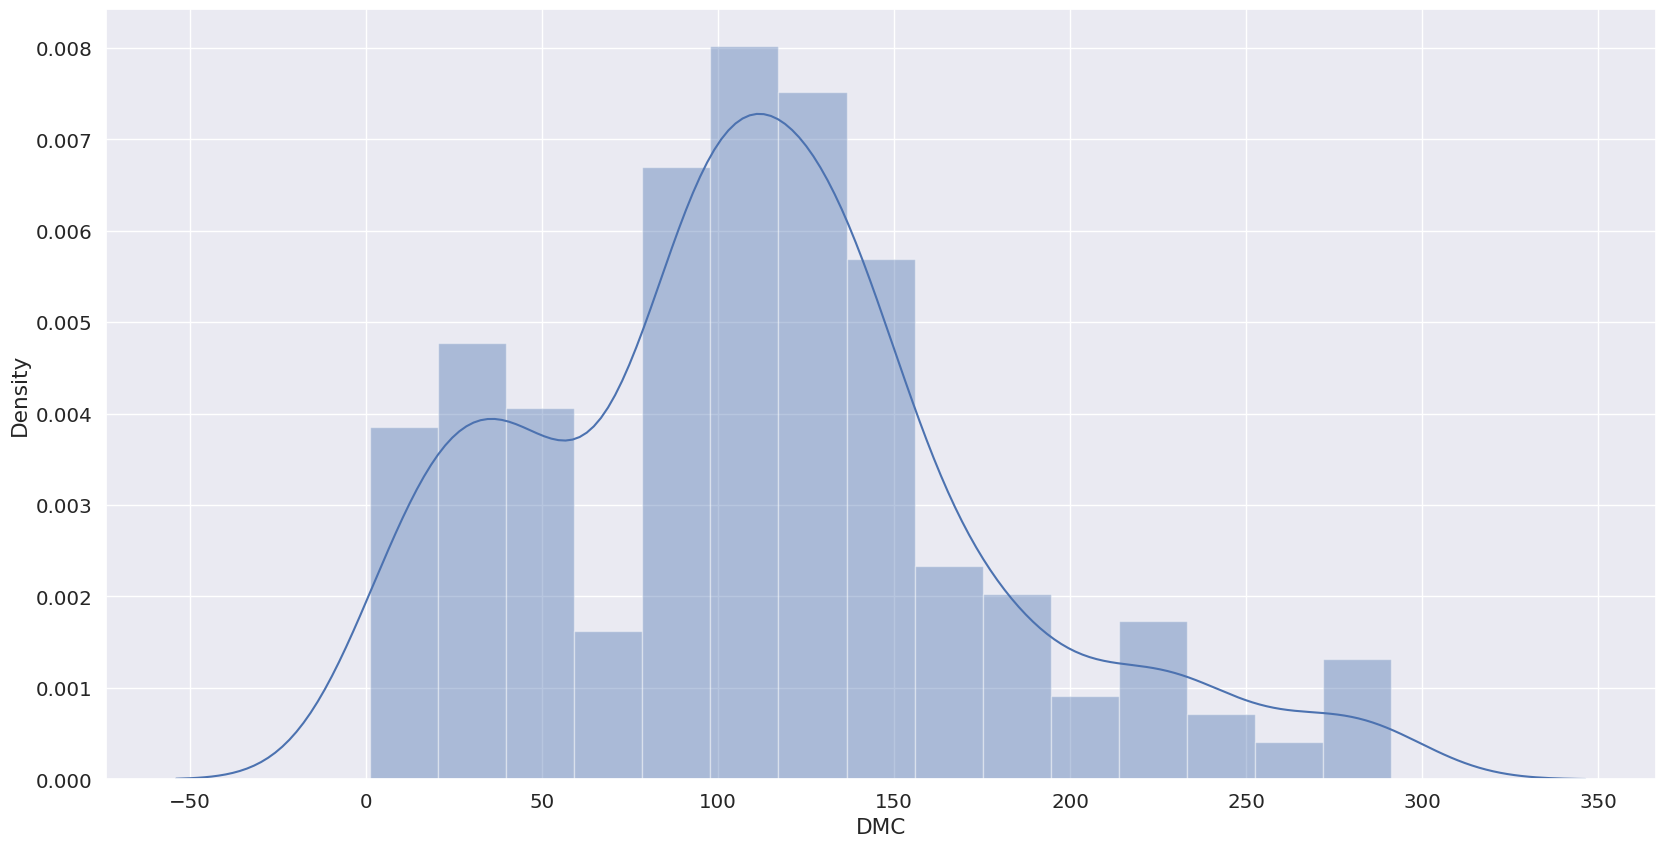

In [166]:
sns.distplot(df["DMC"],hist = True)

<Axes: xlabel='DC', ylabel='Density'>

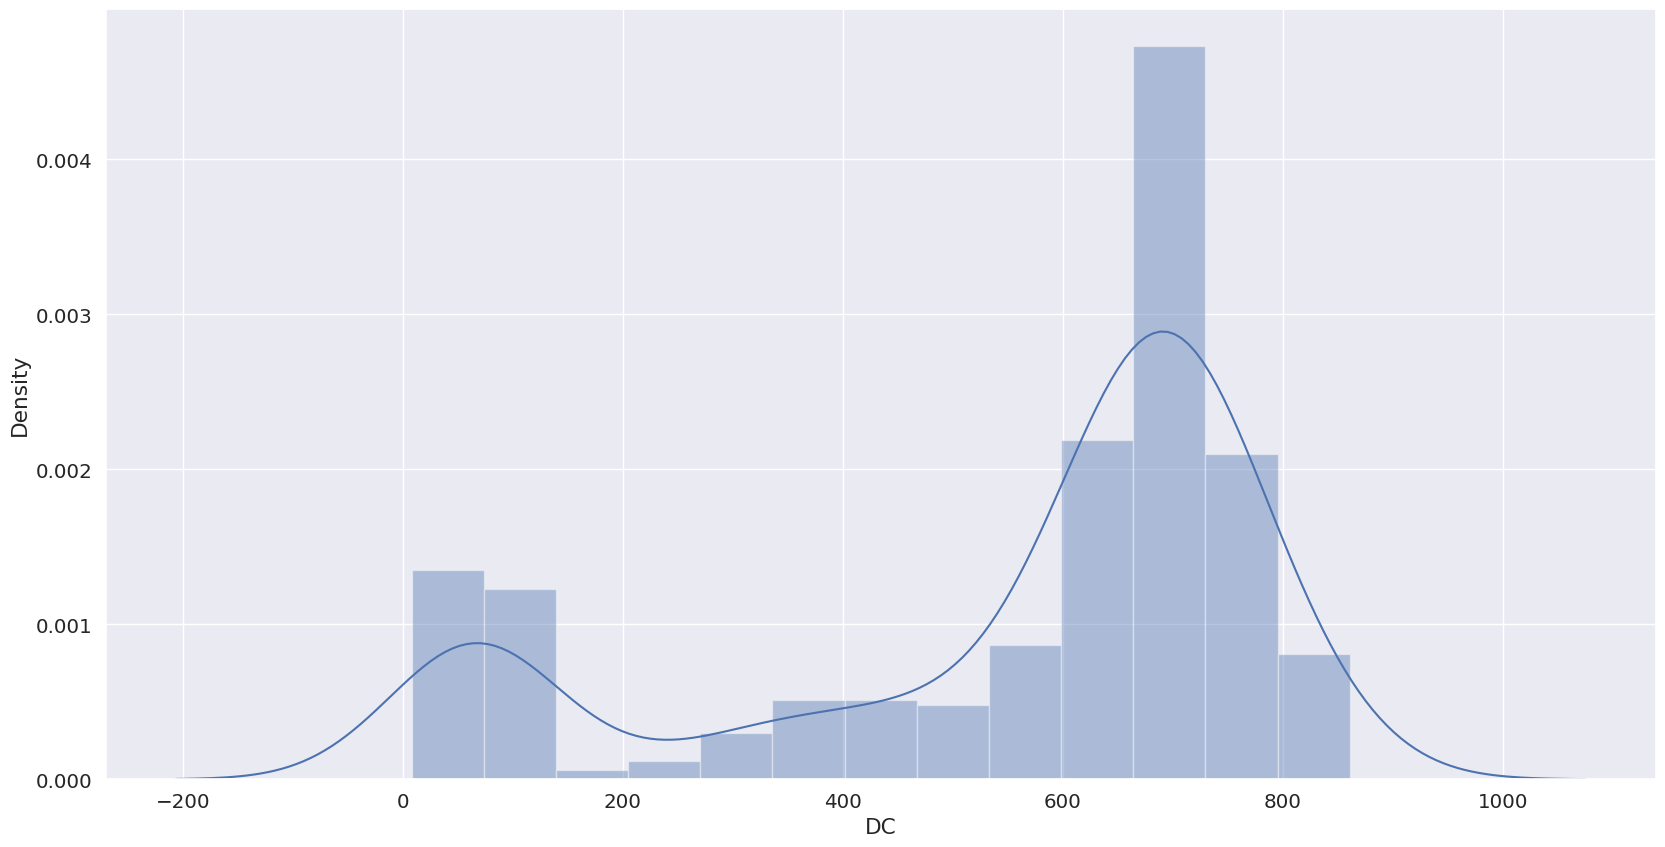

In [167]:
sns.distplot(df["DC"],hist = True)

<Axes: xlabel='ISI', ylabel='Density'>

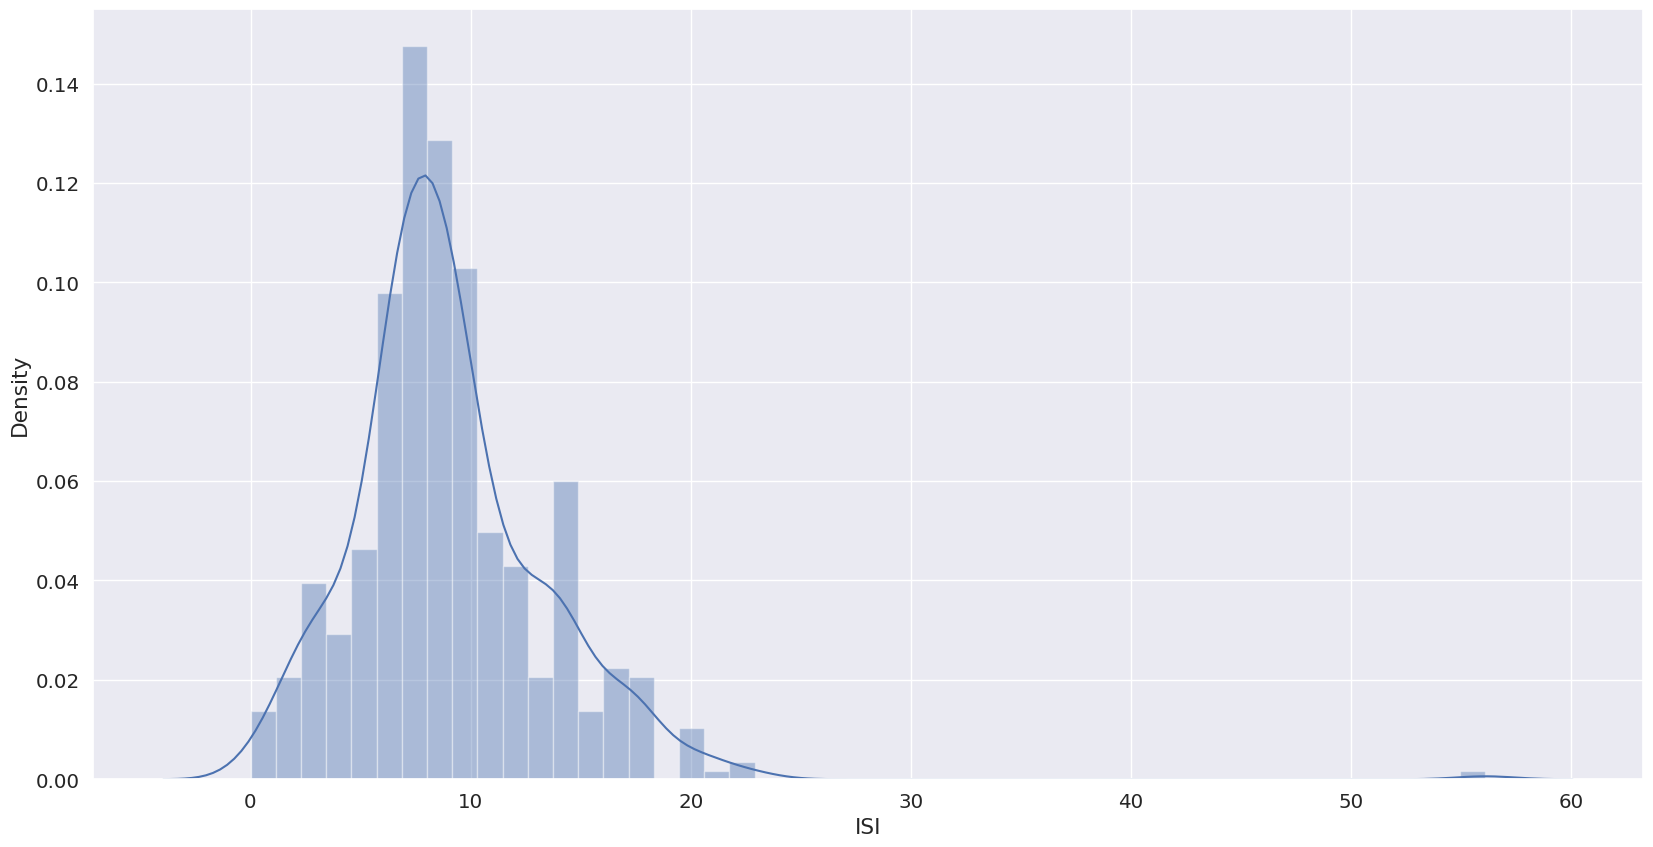

In [168]:
sns.distplot(df["ISI"],hist = True)

<Axes: xlabel='temp', ylabel='Density'>

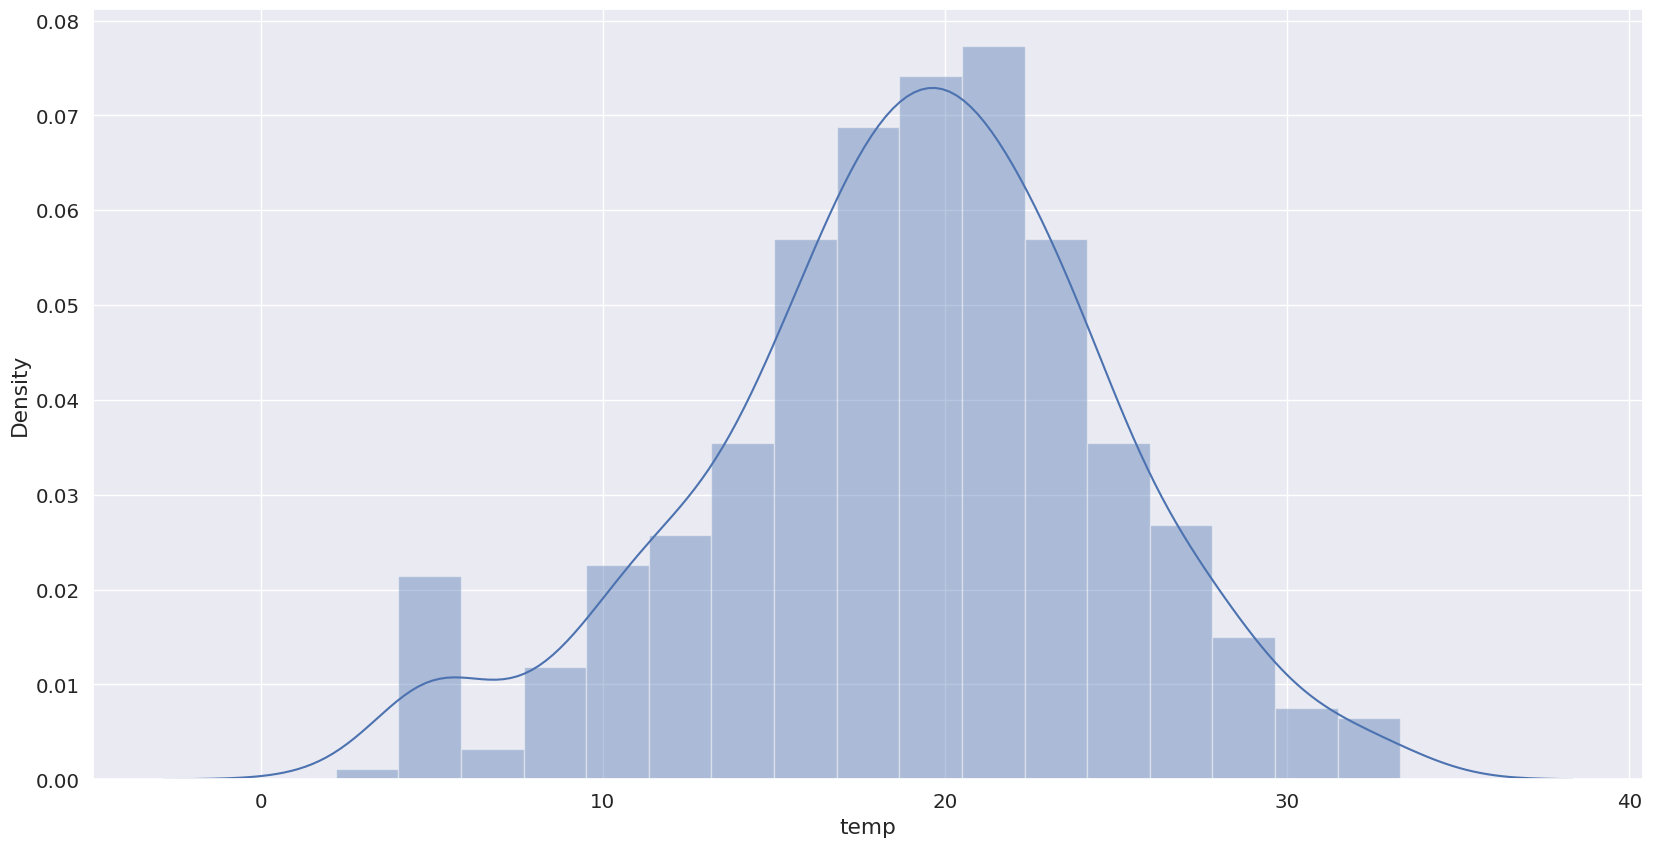

In [169]:
sns.distplot(df["temp"],hist = True)

<Axes: xlabel='RH', ylabel='Density'>

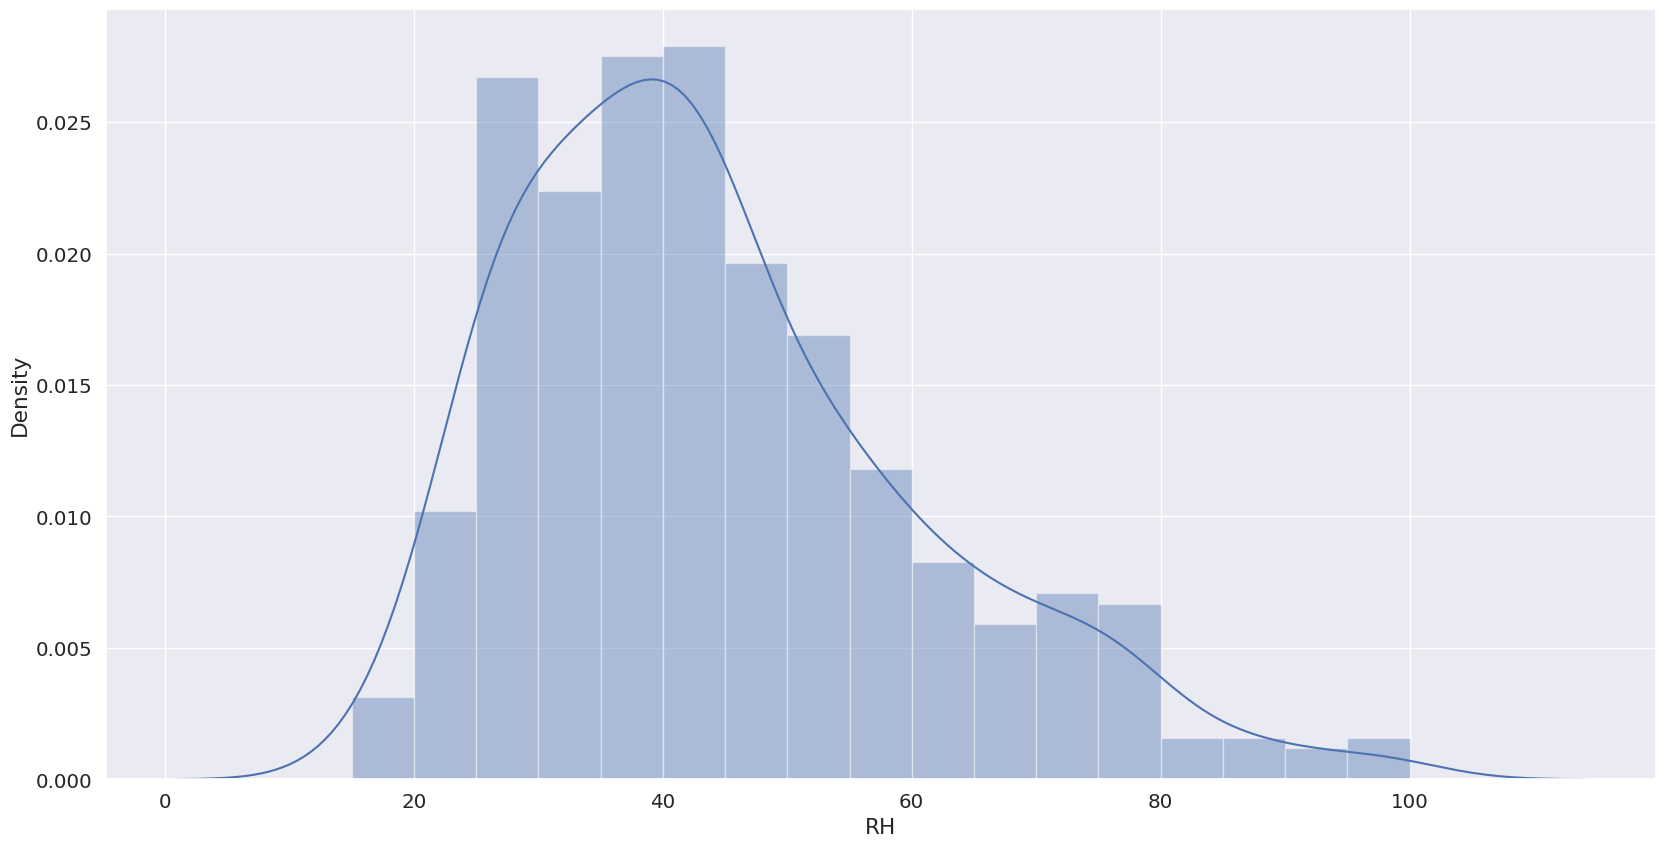

In [170]:
sns.distplot(df["RH"],hist = True)

<Axes: xlabel='wind', ylabel='Density'>

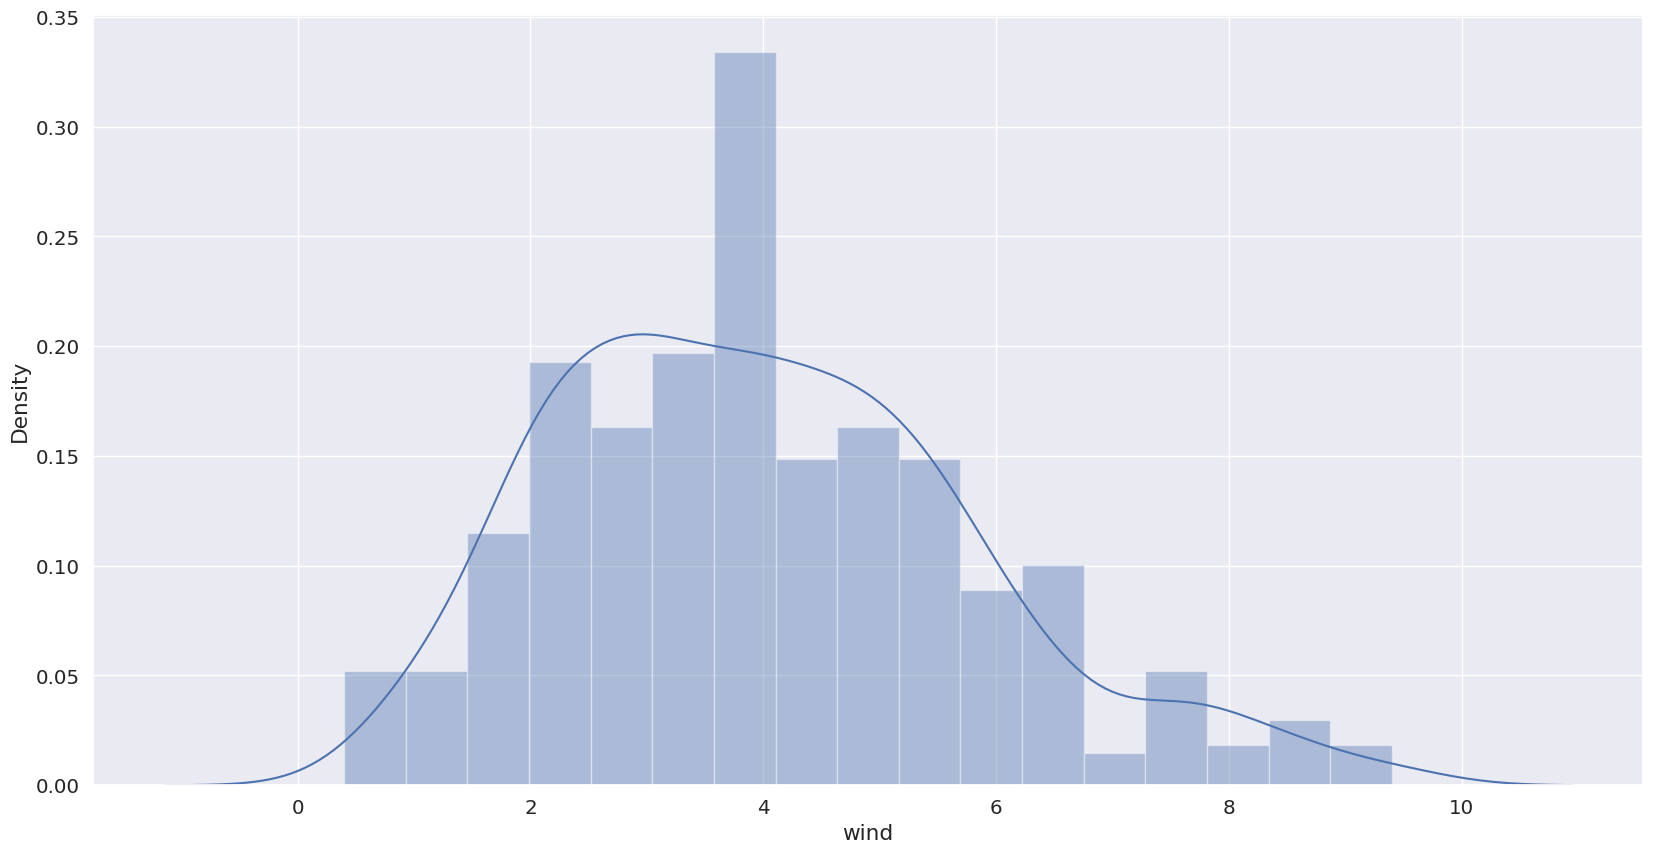

In [171]:
sns.distplot(df["wind"],hist = True)

<Axes: >

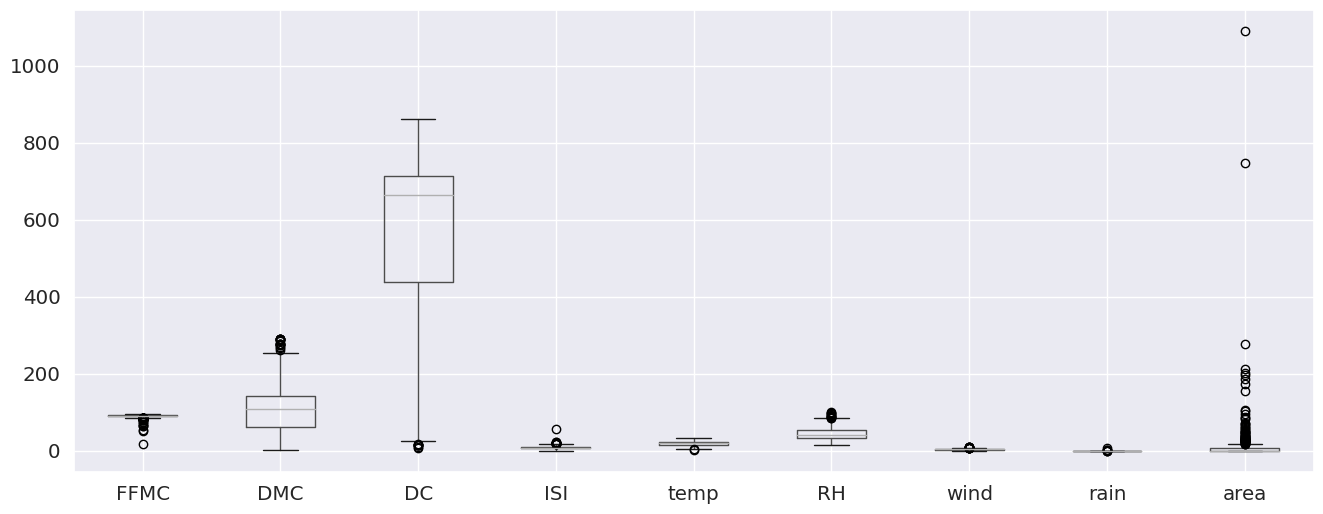

In [172]:
df.boxplot(figsize = (16,6))

[Text(0.5, 1.0, 'Month Vs Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

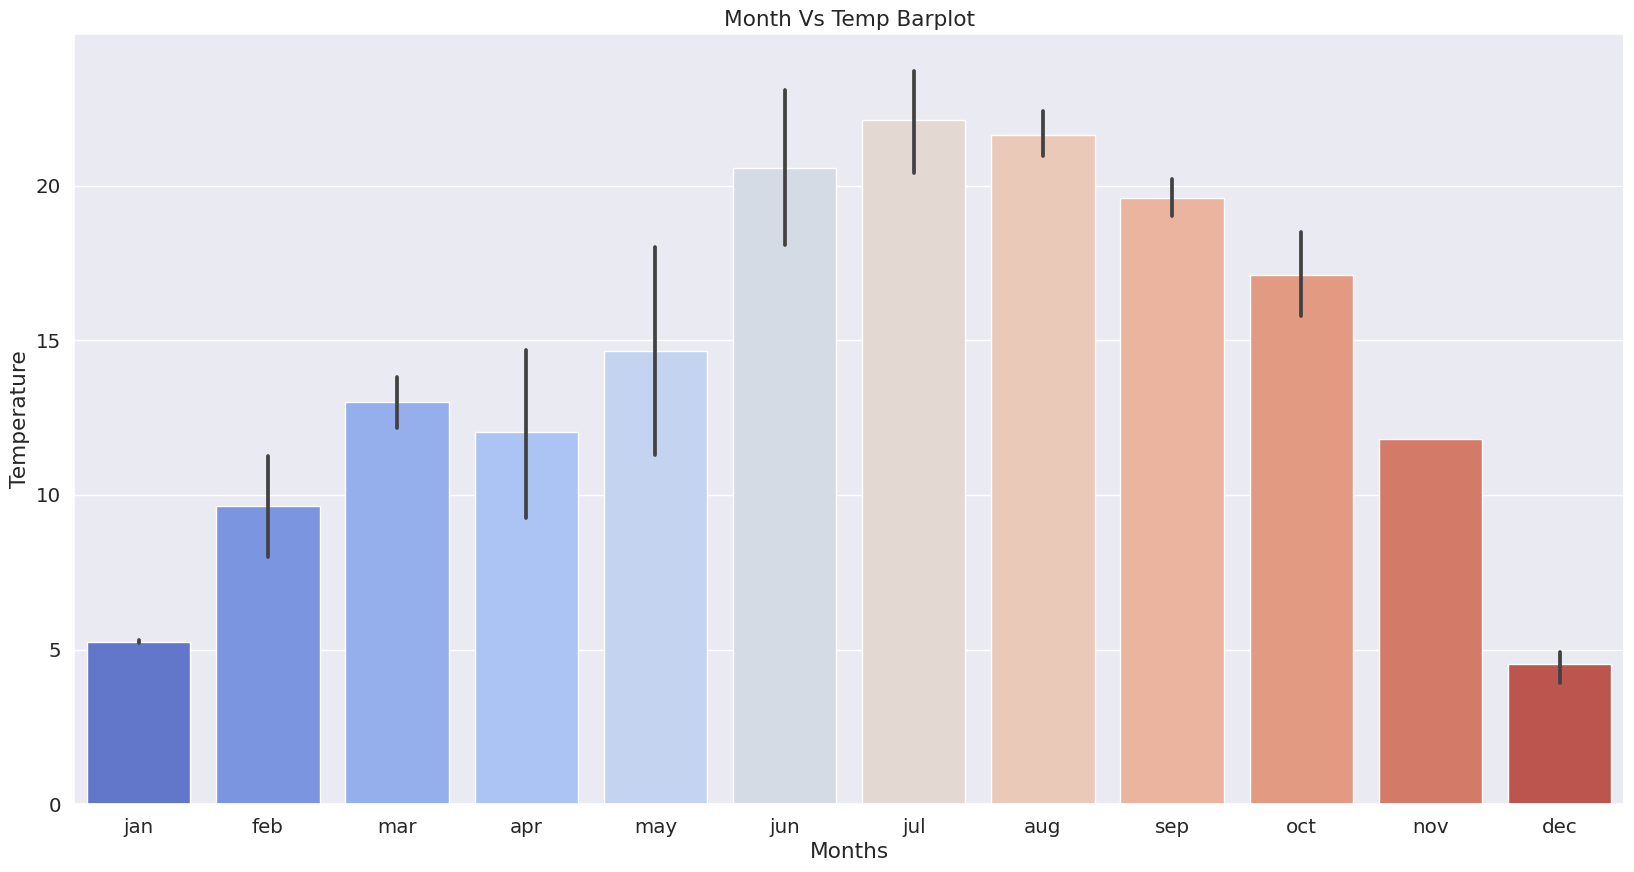

In [173]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

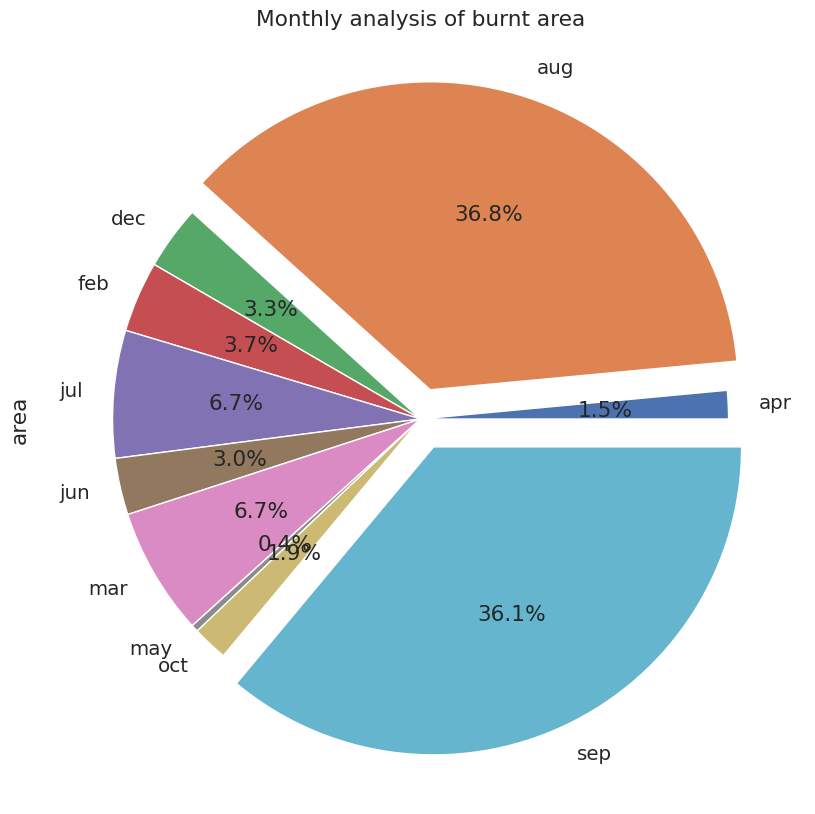

In [174]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=data[data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(14,10),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()


Text(0.5, 1.0, 'Foeest Fire Size Category')

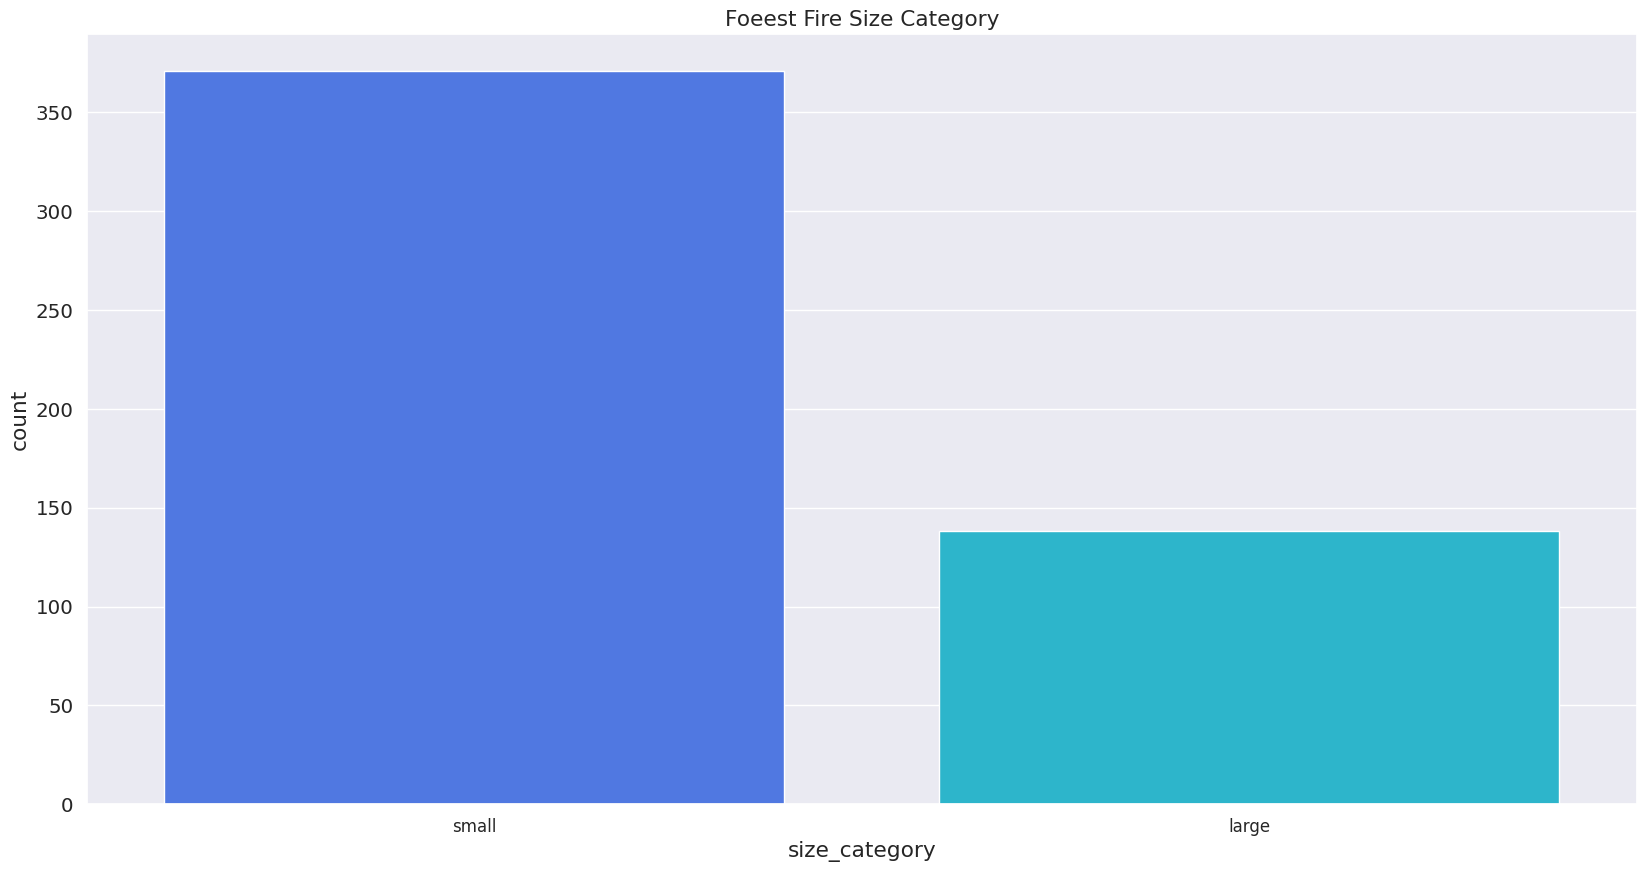

In [175]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data=data, palette = pal,
              order=data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Foeest Fire Size Category')

In [176]:
# Encode Data
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.size_category.replace(('small','large'),(0,1), inplace=True)

In [177]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
X = data.drop(["size_category"], axis =1)
y = data["size_category"]

In [179]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 509, dtype: int64

In [182]:
# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized

array([[-1.96435265e+00,  3.60386544e-01, -7.96039810e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 1.10403336e+00, -1.08399732e+00, -3.25665522e-03, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       [ 1.10403336e+00,  8.41847833e-01, -3.25665522e-03, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       ...,
       [ 2.27351643e-01,  1.32330912e+00, -1.62485856e+00, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 2.27351643e-01,  8.41847833e-01,  6.81419706e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 1.54237422e+00, -1.08399732e+00, -2.00323234e+00, ...,
         2.25388553e+01, -1.74253759e-01, -7.14412875e-01]])

In [183]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,...,509.000000,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02
mean,-2.791916e-17,2.041589e-16,-1.120256e-15,-1.395958e-16,6.979791e-17,-1.343610e-16,2.303331e-16,1.465756e-16,1.395958e-16,-1.395958e-17,...,0.000000,1.744948e-17,-1.221463e-17,2.791916e-17,1.395958e-17,-9.771708e-17,-1.046969e-17,6.979791e-18,-9.771708e-17,6.281812e-17
std,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,...,1.000984,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00
min,-2.841034e+00,-1.565459e+00,-1.295805e+01,-1.712164e+00,-2.177385e+00,-1.969965e+00,-2.855946e+00,-1.789299e+00,-2.007272e+00,-6.903477e-02,...,-0.134164,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
25%,-2.109892e-01,-1.083997e+00,-7.532785e-02,-7.520348e-01,-4.439871e-01,-5.727610e-01,-5.938679e-01,-7.494866e-01,-7.288945e-01,-6.903477e-02,...,-0.134164,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
50%,2.273516e-01,3.603865e-01,1.769213e-01,-3.036890e-02,4.694951e-01,-1.361347e-01,7.447337e-02,-1.378325e-01,-6.333465e-03,-6.903477e-02,...,-0.134164,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
75%,6.656925e-01,8.418478e-01,4.111527e-01,4.873480e-01,6.699368e-01,4.314794e-01,6.742668e-01,5.349871e-01,4.939011e-01,-6.903477e-02,...,-0.134164,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,1.399751e+00
max,1.980715e+00,1.323309e+00,1.005740e+00,2.840606e+00,1.261583e+00,1.027740e+01,2.473647e+00,3.409762e+00,2.995074e+00,2.155478e+01,...,7.453560,4.944694e+00,1.592168e+01,3.860861e+00,5.550901e+00,2.933219e+00,1.592168e+01,2.253886e+01,5.738757e+00,1.399751e+00


In [184]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 40)

In [185]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((356, 30), (153, 30), (356,), (153,))

## Tuning Of HyperParameters
1. Batch Size
2. Epochs

In [186]:
pip install sciKeras

In [187]:
pip install scikit-learn tensorflow

In [188]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import make_scorer
import numpy as np

In [204]:
# Define the model-building function
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=30,kernel_initializer="uniform", activation='relu'))
    model.add(Dense(18,kernel_initializer="uniform", activation='sigmoid'))
    model.add(Dense(1,kernel_initializer="uniform", activation='sigmoid'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [205]:
# Create the model
model = KerasClassifier(build_fn=create_model, verbose=0, batch_size=batch_size, epochs=epochs)

# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100,150]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Use StratifiedKFold for cross-validation if dealing with a classification problem
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


In [206]:
# Define a scoring metric (you can change this based on your problem)
from sklearn.metrics import accuracy_score
scoring = {'accuracy': make_scorer(accuracy_score)}

# Create and fit the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv, refit='accuracy')
grid_result = grid.fit(X_standardized, y)

In [207]:
# Summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_accuracy']
stds = grid_result.cv_results_['std_test_accuracy']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.931187 using {'batch_size': 10, 'epochs': 150}
0.728878 (0.000755) with: {'batch_size': 10, 'epochs': 10}
0.907623 (0.017124) with: {'batch_size': 10, 'epochs': 50}
0.917438 (0.017601) with: {'batch_size': 10, 'epochs': 100}
0.931187 (0.019655) with: {'batch_size': 10, 'epochs': 150}
0.728878 (0.000755) with: {'batch_size': 20, 'epochs': 10}
0.870345 (0.008152) with: {'batch_size': 20, 'epochs': 50}
0.919387 (0.023003) with: {'batch_size': 20, 'epochs': 100}
0.923344 (0.012965) with: {'batch_size': 20, 'epochs': 150}
0.728878 (0.000755) with: {'batch_size': 40, 'epochs': 10}
0.777979 (0.011425) with: {'batch_size': 40, 'epochs': 50}
0.889941 (0.017165) with: {'batch_size': 40, 'epochs': 100}
0.901729 (0.017138) with: {'batch_size': 40, 'epochs': 150}


## Tuning of Hyperparameters : Learning rate and Drop out rate

In [208]:
from keras.layers import Dropout

# Define the model-building function
def create_model(learning_rate , dropout_rate):
    model = Sequential()
    model.add(Dense(64, input_dim=30,kernel_initializer="uniform", activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(18,input_dim=64,kernel_initializer="uniform", activation='sigmoid'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.add(Dropout(dropout_rate))

    optimizer = Adam(learning_rate = learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [209]:
# Create the model
model = KerasClassifier(build_fn=create_model, verbose=0,batch_size= 10 ,epochs =150,learning_rate = learning_rate , dropout_rate = dropout_rate)

# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2,0.4]
param_grid = dict(learning_rate = learning_rate , dropout_rate = dropout_rate)

# Use StratifiedKFold for cross-validation if dealing with a classification problem
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [210]:
# Define a scoring metric (you can change this based on your problem)
scoring = {'accuracy': make_scorer(accuracy_score)}

# Create and fit the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv, refit='accuracy')
grid_result = grid.fit(X_standardized, y)

In [211]:
# Summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_accuracy']
stds = grid_result.cv_results_['std_test_accuracy']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.927277 using {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.917427 (0.024285) with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.909607 (0.014006) with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.770113 (0.021212) with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.927277 (0.014860) with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.903655 (0.028107) with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.736756 (0.006674) with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.919422 (0.019543) with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.895823 (0.019746) with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.728878 (0.000755) with: {'dropout_rate': 0.2, 'learning_rate': 0.1}
0.895835 (0.014209) with: {'dropout_rate': 0.4, 'learning_rate': 0.001}
0.897819 (0.010217) with: {'dropout_rate': 0.4, 'learning_rate': 0.01}
0.728878 (0.000755) with: {'dropout_rate': 0.4, 'learning_rate': 0.1}


## Tuning of Hyperparameters:- Number of Neurons in activation layer

In [214]:
# Define the model-building function
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=30,kernel_initializer="uniform", activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim= neuron1 , kernel_initializer="uniform", activation='sigmoid'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.add(Dropout(0.1))

    optimizer = Adam(learning_rate = 0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [215]:
# Create the model
model = KerasClassifier(build_fn=create_model, verbose=0,batch_size= 10 ,epochs =150,neuron1 = neuron1, neuron2 = neuron2)

# Define the grid search parameters
neuron1 = [32,40,64]
neuron2 = [8,12,32]
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# Use StratifiedKFold for cross-validation if dealing with a classification problem
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [216]:
# Define a scoring metric (you can change this based on your problem)
scoring = {'accuracy': make_scorer(accuracy_score)}

# Create and fit the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv, refit='accuracy')
grid_result = grid.fit(X_standardized, y)

In [217]:
# Summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_accuracy']
stds = grid_result.cv_results_['std_test_accuracy']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.941049 using {'neuron1': 40, 'neuron2': 12}
0.925328 (0.007512) with: {'neuron1': 32, 'neuron2': 8}
0.921371 (0.022886) with: {'neuron1': 32, 'neuron2': 12}
0.929249 (0.012859) with: {'neuron1': 32, 'neuron2': 32}
0.921383 (0.014873) with: {'neuron1': 40, 'neuron2': 8}
0.941049 (0.004960) with: {'neuron1': 40, 'neuron2': 12}
0.923355 (0.012870) with: {'neuron1': 40, 'neuron2': 32}
0.929226 (0.019439) with: {'neuron1': 64, 'neuron2': 8}
0.925316 (0.015595) with: {'neuron1': 64, 'neuron2': 12}
0.917461 (0.016771) with: {'neuron1': 64, 'neuron2': 32}


# Training model with optimum values of Hyperparameters

In [220]:
from sklearn.metrics import classification_report , accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(40,input_dim = 30, kernel_initializer= "normal", activation = "tanh"))
    model.add(Dropout(0.1))
    model.add(Dense(12,input_dim = 40 , kernel_initializer= "normal", activation = "tanh"))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = "sigmoid"))

    adam = Adam(lr = 0.001)
    model.compile(loss = "binary_crossentropy", optimizer = adam , metrics = ["accuracy"])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 10, epochs = 150)

# fitting the model

model.fit(X_standardized , y)

# Predicting using trained model

y_predict = model.predict(X_standardized)
# Printing the metrics
print(accuracy_score(y, y_predict))


0.9941060903732809
